In [1]:
%matplotlib inline
%config Completer.use_jedi = False # to use autocomplete
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
import json
import pandas as pd
import sklearn
from random import seed
from sklearn.model_selection import KFold
from sklearn import linear_model, ensemble, neighbors, tree
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from texttable import Texttable
import scipy.optimize as optimization
RANDOM_SEED=0
seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
print(sklearn.__version__)
from itertools import combinations
from numpy.random import default_rng
import itertools
plt.rcdefaults()
# plt.rcParams.update({'font.family':'fantasy'})

0.24.2


In [2]:
def path_leaf(path): # get filename(with extension) from path
    head, tail = os.path.split(path)
    return tail or os.path.basename(head)


def file_in_folder(folder_path, flag=1): # get files in given folder, return list of filepath and filename
    file_list = []
    file_name = []
    for(dirpath, dirnames, filenames) in os.walk(folder_path):
#         print(filenames)
        
        for i in filenames:
            try:
                file_list += [dirpath + os.sep + i]
                file_name += [i]
            except:
                continue
        if flag == 0:
            break
        file_list.sort(key=path_leaf)
        file_name.sort()
    return [file_list, file_name]

In [10]:
res_dir = '../../prediction_code/mse_in_sample_transfer/in_sample'
all_folders = [os.path.join(res_dir, i) for i in os.listdir(res_dir)]

data_folder = '../../../data/PPP_normalized_44'
file_list, file_name = file_in_folder(data_folder)
file_list = [i for i in file_list if '.csv' in i]
file_name = [i for i in file_name if '.csv' in i]
num_name_dic = {i: name for i, name in enumerate(file_name)}
name_num_dic = {name: i for i, name in enumerate(file_name)}
print(num_name_dic, name_num_dic)

all_params = ['a', 'b', 'd', 'g']
CPT_models = []
for i in range(1, len(all_params)+1):
    tmp = list(itertools.combinations(all_params, i))
    CPT_models += tmp
    
CPT_models = [''.join(i) for i in CPT_models]
CPT_models = ['g', 'ab', 'dg', 'abg', 'abdg']
# model_types = [model_types[-1]]
print(CPT_models)
ML_models = ['DT', 'RF', 'NN']
ML_models = ['Lasso', 'RF', 'NN']
ML_models = ['RF', 'NN', 'kernel_ridge_poly', 'kernel_ridge_rbf']
all_models = CPT_models + ML_models

{0: 'Australia_data_30countries.csv', 1: 'Belgium_data_30countries.csv', 2: 'Brazil_data_30countries.csv', 3: 'Cambodia_data_30countries.csv', 4: 'Chile_data_30countries.csv', 5: 'China_data_30countries.csv', 6: 'Colombia_data_30countries.csv', 7: 'Costa Rica_data_30countries.csv', 8: 'Czech Republic_data_30countries.csv', 9: 'Ethiopia_data_30countries.csv', 10: 'France_data_30countries.csv', 11: 'Germany_data_30countries.csv', 12: 'Guatemala_data_30countries.csv', 13: 'India_data_30countries.csv', 14: 'Japan_data_30countries.csv', 15: 'Kyrgyzstan_data_30countries.csv', 16: 'Malaysia_data_30countries.csv', 17: 'Monetary incentives in the loss domain.csv', 18: 'Nicaragua_data_30countries.csv', 19: 'Nigeria_data_30countries.csv', 20: 'Peru_data_30countries.csv', 21: 'Poland_data_30countries.csv', 22: 'Russia_data_30countries.csv', 23: 'Saudi Arabia_data_30countries.csv', 24: 'South Africa_data_30countries.csv', 25: 'Spain_data_30countries.csv', 26: 'Thailand_data_30countries.csv', 27: 'T

In [11]:
show_num_name_dic = {'num': [], 'name': []}
for key, val in num_name_dic.items():
    show_num_name_dic['num'].append(key)
    show_num_name_dic['name'].append(val)
num_name_df = pd.DataFrame.from_dict(show_num_name_dic)
print(num_name_df.to_latex(index=False))
num_name_df



\begin{tabular}{rl}
\toprule
 num &                                               name \\
\midrule
   0 &                     Australia\_data\_30countries.csv \\
   1 &                       Belgium\_data\_30countries.csv \\
   2 &                        Brazil\_data\_30countries.csv \\
   3 &                      Cambodia\_data\_30countries.csv \\
   4 &                         Chile\_data\_30countries.csv \\
   5 &                         China\_data\_30countries.csv \\
   6 &                      Colombia\_data\_30countries.csv \\
   7 &                    Costa Rica\_data\_30countries.csv \\
   8 &                Czech Republic\_data\_30countries.csv \\
   9 &                      Ethiopia\_data\_30countries.csv \\
  10 &                        France\_data\_30countries.csv \\
  11 &                       Germany\_data\_30countries.csv \\
  12 &                     Guatemala\_data\_30countries.csv \\
  13 &                         India\_data\_30countries.csv \\
  14 &             

,num,name
0,0,Australia_data_30countries.csv
1,1,Belgium_data_30countries.csv
2,2,Brazil_data_30countries.csv
3,3,Cambodia_data_30countries.csv
4,4,Chile_data_30countries.csv
5,5,China_data_30countries.csv
6,6,Colombia_data_30countries.csv
7,7,Costa Rica_data_30countries.csv
8,8,Czech Republic_data_30countries.csv
9,9,Ethiopia_data_30countries.csv


In [12]:
def get_in_sample(folder='../../prediction_code/mse_in_sample_transfer/in_sample'):
    in_sample_folders = os.listdir(folder)
    res = {}
    method_dic = {}
    for cur_fol in in_sample_folders:
        file_list, file_name = file_in_folder(os.path.join(folder, cur_fol))
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        for file in file_list:
            with open(file, 'r') as f:
                content = json.load(f)
#             print(content)
            if cur_fol not in res.keys():
                res[cur_fol] = {}

            res[cur_fol][content['model_type']] = content['train_mse']
            if content['model_type'] in CPT_models:
                if content['method'] not in method_dic.keys():
                    method_dic[content['method']] = 0
                method_dic[content['method']] += 1
#     print(res)
    return res, method_dic


def get_cv(folder='../../prediction_code/cv_mse/in_sample'):
    in_sample_folders = os.listdir(folder)
    res = {}
    method_dic = {}
    for cur_fol in in_sample_folders:
        file_list, file_name = file_in_folder(os.path.join(folder, cur_fol))
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        for file in file_list:
            with open(file, 'r') as f:
                content = json.load(f)
#             print(content)
            if cur_fol not in res.keys():
                res[cur_fol] = {}

            if content['model_type'] not in res[cur_fol].keys():
                res[cur_fol][content['model_type']] = {'y_true': [], 'y_pred': []}
            res[cur_fol][content['model_type']]['y_true'].append(content['y_true'])
            res[cur_fol][content['model_type']]['y_pred'].append(content['y_pred'])
#             if content['model_type'] in CPT_models:
#                 if content['method'] not in method_dic.keys():
#                     method_dic[content['method']] = 0
#                 method_dic[content['method']] += 1
#     print(res)
    for key in res.keys():
        for model in res[key].keys():
            tmp = [metrics.mean_squared_error(res[key][model]['y_true'][i], res[key][model]['y_pred'][i]) for i in range(len(res[key][model]['y_true']))]
            tmp = np.mean(np.sqrt(tmp))
            res[key][model] = tmp
    return res, method_dic

In [13]:
in_sample_res, method_dic = get_in_sample()
method_dic

{'L-BFGS-B': 99, 'trust-constr': 68, 'TNC': 25, 'Powell': 28}

In [14]:
def get_round(a, digit=3):
    return round(a, digit)

def get_res(folder, normalize=False, in_sample_dic=None):
    file_list, file_name = file_in_folder(folder)
    file_list = [i for i in file_list if '.json' in i]
    file_name = [i for i in file_name if '.json' in i]
    print(file_list)
    res_dic = {'model': [], 'train_data': [], 'train_mse': []}
    train_data = folder.split('/')[1]
    print(train_data)
    for model_type in all_models:
        for file in file_list:
            file_type = path_leaf(file).split('.json')[0]
            if model_type == file_type:
                with open(file, 'r') as f:
                    content = json.load(f)
#                 print(content)
                res_dic['model'].append(content['model_type'])
                res_dic['train_data'].append(train_data)
                res_dic['train_mse'].append(get_round(content['train_mse']))
#                 res_dic['method'].append(content['method'])
                for key, val in content['test_mse'].items():
                    if key not in res_dic.keys():
                        res_dic[key] = []
                    if normalize:
                        res_dic[key].append(get_round(val/in_sample_dic[key][model_type]))
                    else:
                        res_dic[key].append(get_round(val))

#     print(res_dic)
    df = pd.DataFrame.from_dict(res_dic)
    display(df)
    print(df.to_latex(index=False))
    return res_dic

In [15]:
print(len(in_sample_res.keys()))
# in_sample_res['31']


44


# insample/CV CPT to RF

In [16]:
in_sample_res, _ = get_in_sample()
# cv_res, _ = get_in_sample('../../cv_mse/in_sample')
cv_res, _ = get_cv()

In [17]:
def get_ratio(data, tar1='abdg', tar2='RF', sqrt=True):
    ratio = []
    for domain, dic in data.items():
#         print(dic[tar1])
        if sqrt:
            ratio.append(np.sqrt(dic[tar1]/dic[tar2]))
        else:
            ratio.append(dic[tar1]/dic[tar2])
    return ratio

In [18]:
in_sample_ratio = get_ratio(in_sample_res)
cv_ratio = get_ratio(cv_res, sqrt=False)
print(in_sample_ratio)
print(cv_ratio)
print(np.array(in_sample_ratio) - np.array(cv_ratio))

[1.3571980802828194, 1.0106741089353093, 1.0055942241767502, 2.1042983910140394, 1.009326025513433, 1.0087642007982722, 1.013178686515054, 1.0210280372186913, 1.0545557080531531, 1.0362215185224308, 1.0195786372981743, 1.02768387252482, 1.0148713959717564, 1.6752419920804842, 1.0140811039192816, 1.0278597980965407, 1.0114901644535919, 1.0253425830948617, 1.0396326982141115, 1.0048341099061946, 1.0179133587658311, 1.035129658307321, 1.0234669173429345, 1.0031027763841578, 1.0330910500875645, 0.9999906206788141, 1.0065851784128557, 1.0247526193129912, 1.0213080284954572, 1.0097336073461811, 0.9999971321235961, 1.0170468303899423, 1.023483275379869, 1.0236220316777747, 1.011540352582153, 1.0148499603243746, 1.0256347404455732, 1.0050192571306353, 1.025913226378516, 1.0129450005720733, 1.0175708444780103, 1.0197110387183246, 1.0248619083299706, 1.029836697547113]
[1.3548656525700715, 1.0112538195539513, 1.0029006605459356, 2.1047048556821055, 0.9997392682720022, 1.0012835340358621, 1.00350

In [19]:
for i, val in enumerate(in_sample_ratio):
    if val < 1:
        print(i, val)
for i, val in enumerate(cv_ratio):
    if val < 1:
        print(i, val)

25 0.9999906206788141
30 0.9999971321235961
4 0.9997392682720022
12 0.9998786530306742
23 0.9995007185166885
25 0.9992068553803797
26 0.9839640130117575


In [20]:
# abdg to RF
res_dic = {'model': [], 'in sample': [], 'CV': []}
for tar1 in CPT_models:
    in_sample_ratio = get_ratio(in_sample_res, tar1=tar1)
    cv_ratio = get_ratio(cv_res, tar1=tar1, sqrt=False)
    res_dic['model'].append(tar1)
    res_dic['in sample'].append(np.mean(in_sample_ratio))
    res_dic['CV'].append(np.mean(cv_ratio))
df = pd.DataFrame.from_dict(res_dic)
display(df)
print(df.to_latex(index=False))

,model,in sample,CV
0,g,1.132856,1.122534
1,ab,1.231396,1.221408
2,dg,1.091146,1.082513
3,abg,1.075954,1.067506
4,abdg,1.066104,1.058064


\begin{tabular}{lrr}
\toprule
model &  in sample &       CV \\
\midrule
    g &   1.132856 & 1.122534 \\
   ab &   1.231396 & 1.221408 \\
   dg &   1.091146 & 1.082513 \\
  abg &   1.075954 & 1.067506 \\
 abdg &   1.066104 & 1.058064 \\
\bottomrule
\end{tabular}



In [21]:
# abdg to Kernel
res_dic = {'model': [], 'in sample': [], 'CV': []}
for tar1 in CPT_models:
    in_sample_ratio = get_ratio(in_sample_res, tar1=tar1, tar2='kernel_ridge_rbf')
    cv_ratio = get_ratio(cv_res, tar1=tar1, tar2='kernel_ridge_rbf', sqrt=False)
    res_dic['model'].append(tar1)
    res_dic['in sample'].append(np.mean(in_sample_ratio))
    res_dic['CV'].append(np.mean(cv_ratio))
df = pd.DataFrame.from_dict(res_dic)
display(df)
print(df.to_latex(index=False))

,model,in sample,CV
0,g,1.124777,1.118640
1,ab,1.222736,1.217137
2,dg,1.083325,1.078801
3,abg,1.068230,1.063871
4,abdg,1.058427,1.054459


\begin{tabular}{lrr}
\toprule
model &  in sample &       CV \\
\midrule
    g &   1.124777 & 1.118640 \\
   ab &   1.222736 & 1.217137 \\
   dg &   1.083325 & 1.078801 \\
  abg &   1.068230 & 1.063871 \\
 abdg &   1.058427 & 1.054459 \\
\bottomrule
\end{tabular}



In [22]:
# EU to RF
res_dic = {'model': [], 'in sample': [], 'CV': []}
for tar1 in CPT_models:
    in_sample_ratio = get_ratio(in_sample_res, tar1='EU_iso', tar2='RF')
    cv_ratio = get_ratio(cv_res, tar1='EU_iso', tar2='RF', sqrt=False)
    res_dic['model'].append(tar1)
    res_dic['in sample'].append(np.mean(in_sample_ratio))
    res_dic['CV'].append(np.mean(cv_ratio))
df = pd.DataFrame.from_dict(res_dic)
display(df)
print(df.to_latex(index=False))

,model,in sample,CV
0,g,1.220735,1.210875
1,ab,1.220735,1.210875
2,dg,1.220735,1.210875
3,abg,1.220735,1.210875
4,abdg,1.220735,1.210875


\begin{tabular}{lrr}
\toprule
model &  in sample &       CV \\
\midrule
    g &   1.220735 & 1.210875 \\
   ab &   1.220735 & 1.210875 \\
   dg &   1.220735 & 1.210875 \\
  abg &   1.220735 & 1.210875 \\
 abdg &   1.220735 & 1.210875 \\
\bottomrule
\end{tabular}



In [23]:
# EU to Kernel
res_dic = {'model': [], 'in sample': [], 'CV': []}
for tar1 in CPT_models:
    in_sample_ratio = get_ratio(in_sample_res, tar1='EU_iso', tar2='kernel_ridge_rbf')
    cv_ratio = get_ratio(cv_res, tar1='EU_iso', tar2='kernel_ridge_rbf', sqrt=False)
    res_dic['model'].append(tar1)
    res_dic['in sample'].append(np.mean(in_sample_ratio))
    res_dic['CV'].append(np.mean(cv_ratio))
df = pd.DataFrame.from_dict(res_dic)
display(df)
print(df.to_latex(index=False))

,model,in sample,CV
0,g,1.212166,1.20666
1,ab,1.212166,1.20666
2,dg,1.212166,1.20666
3,abg,1.212166,1.20666
4,abdg,1.212166,1.20666


\begin{tabular}{lrr}
\toprule
model &  in sample &      CV \\
\midrule
    g &   1.212166 & 1.20666 \\
   ab &   1.212166 & 1.20666 \\
   dg &   1.212166 & 1.20666 \\
  abg &   1.212166 & 1.20666 \\
 abdg &   1.212166 & 1.20666 \\
\bottomrule
\end{tabular}



# transfer ratio/difference between abdg and RF

In [24]:
def get_all_transfer_error(folder_list):
    all_res_dic = {}
    for folder in folder_list:
        file_list, file_name = file_in_folder(folder)
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        
        train_data = folder.split('/')[-1]
        for model_type in all_models:
            if model_type not in all_res_dic.keys():
                all_res_dic[model_type] = {
                    'train_data': [], 
                    'transfer_domain': [], 
#                     'in_sample': [], 
                    'raw_transfer': [], 
#                     'best_in_sample': [], 
#                     'transfer_ratio': []
                }
            for file in file_list:
                file_type = path_leaf(file).split('.json')[0]
                if model_type == file_type:
                    with open(file, 'r') as f:
                        content = json.load(f)

                    all_transfer_domain = []
                    all_transfer_error_ratio = []
                    raw_transfer = []
                    in_sample = []
                    best_in_sample = []
                    for key, val in content['test_mse'].items():
                        all_transfer_domain.append(key)
                        raw_transfer.append(get_round(np.sqrt(val)))
                    
                    all_res_dic[model_type]['train_data'].append([train_data]*len(all_transfer_domain))
                    all_res_dic[model_type]['transfer_domain'].append(all_transfer_domain)
                    all_res_dic[model_type]['raw_transfer'].append(raw_transfer)



    return all_res_dic

In [25]:
all_res = get_all_transfer_error(folder_list=all_folders)

In [26]:
all_folders[:10]

['../../prediction_code/mse_in_sample_transfer/in_sample/32',
 '../../prediction_code/mse_in_sample_transfer/in_sample/35',
 '../../prediction_code/mse_in_sample_transfer/in_sample/34',
 '../../prediction_code/mse_in_sample_transfer/in_sample/33',
 '../../prediction_code/mse_in_sample_transfer/in_sample/.DS_Store',
 '../../prediction_code/mse_in_sample_transfer/in_sample/20',
 '../../prediction_code/mse_in_sample_transfer/in_sample/18',
 '../../prediction_code/mse_in_sample_transfer/in_sample/27',
 '../../prediction_code/mse_in_sample_transfer/in_sample/9',
 '../../prediction_code/mse_in_sample_transfer/in_sample/0']

In [27]:
def change_to_greek(models):
    dic = {'g': r'$\gamma$', 'ab': r'$\alpha\beta$', 'dg': r'$\delta\gamma$', 
           'abg': r'$\alpha\beta\gamma$', 'abdg': r'$\alpha\beta\delta\gamma$', 
           'RF': 'RF', 'NN': 'NN', 'Random Forest': 'RF', 'Neural Net': 'NN'
          }
    res = []
    for i in models:
        res.append(dic[i])
    return res

def get_index(arr, median_of):
    # median_of is 'min', 'max', or percentile (50, 75, 90, etc.)
    if median_of == 'max':
        return np.argmax(arr)
    elif median_of == 'min':
        return np.argmin(arr)
    else:
        percent = int(median_of)
        interpolation = 'higher'
        if percent < 50:
            interpolation = 'lower'
        val = np.percentile(arr, percent, interpolation=interpolation)

        if type(arr) == np.ndarray:
            return np.where(arr == val)[0][0]
        else:
            return arr.index(val)

def clean_for_interval(mat, lower_percent, higher_percent):
    tmp = mat.reshape(-1,)
    res = {'range': [], 'lower': [], 'higher': []}
    for i in range(len(lower_percent)):
        res['range'].append(f'{lower_percent[i]}-{higher_percent[i]}')
        res['lower'].append(tmp[get_index(tmp, lower_percent[i])])
        res['higher'].append(tmp[get_index(tmp, higher_percent[i])])
    return res

def plot_intervals(mat, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
#     res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
#     res['model'] = model
#     res[f'lower'] = data[lower_percent]
#     res[f'higher'] = data[higher_percent]
    
    res = clean_for_interval(mat, lower_percent, higher_percent)
    count = 0
    for i in range(len(res['lower'])):
#         if all_models[i] not in model:
#             continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(res['range'])-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plt.plot(x, y, lw=lw)
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Range')
    plt.yticks(range(len(res['range'])), reversed(res['range']))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

    
def plot_hist(mat, keyword='Error', savepath=None):
    plt.hist(mat.reshape(-1,), bins=100)
    
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Frenquency')
    plt.xscale('log')
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()    
    

def plot_multiple_CPT_intervals(mat, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
#     res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
#     res['model'] = model
#     res[f'lower'] = data[lower_percent]
#     res[f'higher'] = data[higher_percent]
    res_dic = {}
    for key, val in mat.items():
        res_dic[key] = clean_for_interval(val, lower_percent, higher_percent)
#     res = clean_for_interval(mat, lower_percent, higher_percent)
    count = 0
    model = []
    for i in res_dic.keys():
        model.append(i)
        res = res_dic[i]
#         if all_models[i] not in model:
#             continue
        x = np.linspace(res['lower'][0], res['higher'][0], 100)
        y = [len(res_dic.keys())-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plt.plot(x, y, lw=lw)
        print(x[0], x[-1])
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Model')
#     plt.yticks(range(len(res['range'])), reversed(res['range']))
    plt.yticks(range(len(model)), change_to_greek(reversed(model)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

    
def plot_hist(mat, keyword='Error', savepath=None):
    plt.hist(mat.reshape(-1,), bins=100)
#     plt.xscale('log')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Frenquency')
#     plt.xscale('log')
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()    
def plot_cdf(mat, keyword='Error', savepath=None):
    left = np.min(mat)
    right = np.max(mat)
    y = []
    count = 0
    flag = 1
    for i in np.linspace(left, right, 1000):
        y.append(np.sum(mat < i)/mat.reshape(-1,).shape[0])
        if i > 1 and flag:
            count = len(y)
            flag = 0
    print(count, len(y), count / len(y))
    plt.plot(np.linspace(left, right, 1000), y)
    
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Cumulative density')
    plt.xscale('log')
#     plt.xscale('log')
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()    
    
    
plt.rcdefaults()
plt.rcParams.update({'font.size':18})
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rc('text', usetex=True)
transfer_error = 'Transfer error'
# normalized_transfer = 'Normalized transfer error'
# same_model_transfer = 'Transfer deterioration'
# fol = '../stack_figures/to_stack'
fol = 'RF_to_CPT'
fol = '.'

In [28]:
abdg_res = np.array(all_res['abdg']['raw_transfer'])
RF_res = np.array(all_res['RF']['raw_transfer'])
tmp = RF_res/abdg_res
np.max(tmp)
np.min(tmp)

0.21017413124477224

0.9385665529010239 4.5160256410256405
0.9271557271557271 3.8832471875950136
0.9329617834394904 4.29418150238819
0.8875 3.873414230557088
0.8870552611657835 4.221077127659574


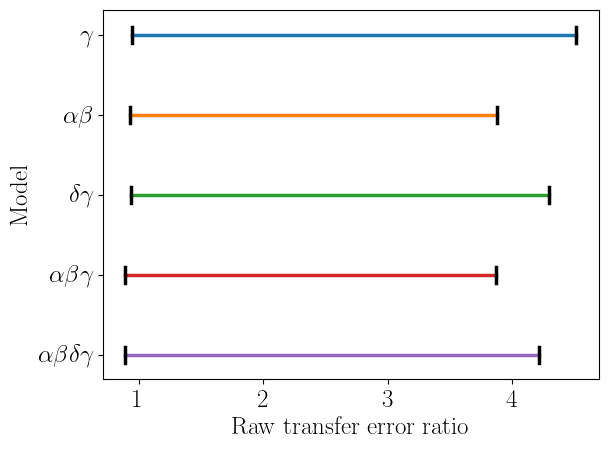

In [29]:
abdg_res = np.array(all_res['abdg']['raw_transfer'])
RF_res = np.array(all_res['RF']['raw_transfer'])
all_ratio_mats = {}
for model in CPT_models:
    all_ratio_mats[model] = RF_res / np.array(all_res[model]['raw_transfer'])
plot_multiple_CPT_intervals(all_ratio_mats, lower_percent=[5], higher_percent=[95], keyword='Raw transfer error ratio', savepath=f'{fol}/single_domain_transfer_error_ratio_5_95_interval.pdf')

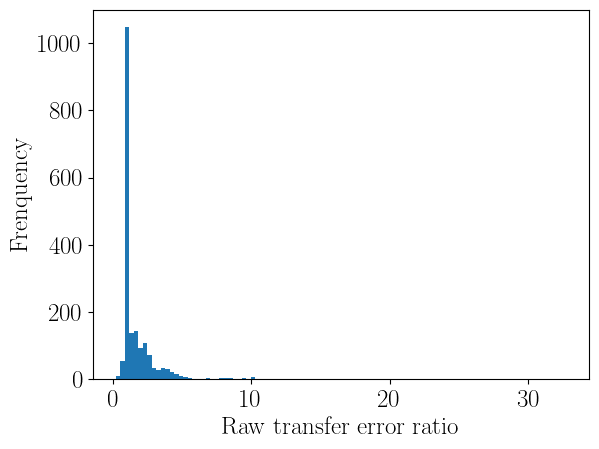

26 1000 0.026


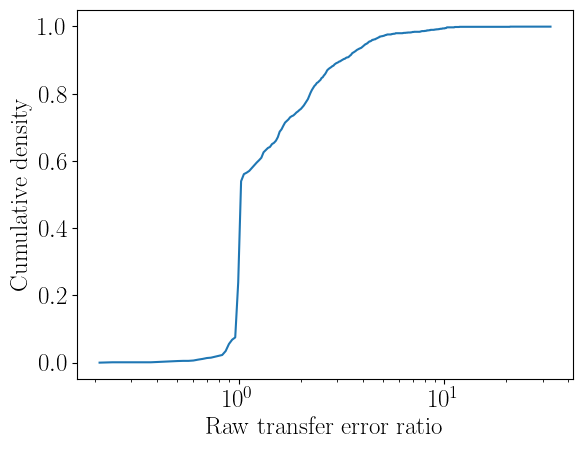

In [30]:
plot_hist(all_ratio_mats['abdg'], keyword='Raw transfer error ratio', savepath=f'{fol}/single_domain_transfer_error_ratio_hist.pdf')
plot_cdf(all_ratio_mats['abdg'], keyword='Raw transfer error ratio', savepath=f'{fol}/single_domain_transfer_error_ratio_cdf.pdf')